# Home assignment 1: Kalman Filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [43]:
import numpy as np
import plotly.io as pio
import plotly.graph_objects as go

In [44]:
pio.renderers.default = 'svg'

In [45]:
def kalman_filter(x, E):
    """Apply Kalman filter to sequence

    Args:
        x: initial state space configuration (location and velocity)
        E: initial covariance matrix
    """
    k_log = []
    x_hist = [x]
    E_hist = [E]

    for measurement in measurements:
        # prediction
        x = (F @ x) + u
        E = F @ E @ F.T

        # measurement update
        Z = np.array([measurement])
        S = H @ E @ H.T + R
        K = E @ H.T @ np.linalg.inv(S)
        k_log.append(K)
        x = x + (K @ (Z.T - (H @ x)))
        E = (I - (K @ H)) @ E
        x_hist.append(x)
        E_hist.append(E)
#         print(f"x= \n{x}")
#         print(f"E= \n{E}")

    return k_log, x_hist, E_hist

You could edit `kalman_filter` function if you need more info about the process e.g. `x` values over time and so on

_Hint:_ to define matrices below function [np.diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) is very handy

In [46]:
dt = 0.1

# initial covariance matrix: 0. for positions x and y, 1000 for the two velocities
E = np.diag([0, 0, 1000, 1000])

# next state function: 4D
F = np.array([[1, 0, dt, 0],
              [0, 1, 0, dt],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

# measurement function: reflect the fact that we observe x and y but not the two velocities
H = np.array([[1,0,0,0],[0,1,0,0]])

# measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
R = np.diag([0.1, 0.1])

# 4D identity matrix
I = np.eye(4)

## First experiment

In [47]:
measurements = [[5.0, 10.0], [6.0, 8.0], [7.0, 6.0], [8.0, 4.0], [9.0, 2.0], [10.0, 0.0]]
initial_xy = [4.0, 12.0]


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [48]:
k_log, x_hist, E_hist = kalman_filter(x, E)

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

_(It's a good idea to write a function for this, so you could reuse it in the next experiment)_

In [49]:
def visualise_kalman(x, E, dt=dt):
    time = np.array(range(len(x) + 1))* dt
    title = ['X projection', 'Y projection', 'Vx speed', 'Vy speed']
    title_pair = ['2D Trajectory', 'Hodograph']
    y_axis_title = ['X projection', 'Y projection', 'Vx', 'Vy']
    data = []
    var = []

    for i in range(len(x[0])):
        data.append(np.array([st[i] for st in x]).flatten())
        # var.append(np.array([st[i][i] for st in E]).flatten())
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=time, y=data[i], mode='lines+markers',
                      # error_y=dict(
                      #     type='data',
                      #     array=var[i],
                      #     color='purple',
                      #     thickness=1.5,
                      #     width=3,
                      # ),
                                 ))
        fig.update_layout(
            title=title[i],
            xaxis_title="Time",
            yaxis_title=y_axis_title[i],
            font=dict(
                family="Courier New, monospace",
                size=14,
                color="RebeccaPurple"
            )
        )
        fig.show()

    for i in range(2):
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=data[2 * i], y=data[2 * i + 1], mode='lines+markers',
                                 text=np.round(time,2), textposition='top center',
                                 # error_y=dict(
                                 #     type='data',
                                 #     array=var[2 * i + 1],
                                 #     color='purple',
                                 #     thickness=1.5,
                                 #     width=3,
                                 # ),
                                 # error_x=dict(
                                 #     type='data',
                                 #     array=var[2 * i],
                                 #     color='purple',
                                 #     thickness=1.5,
                                 #     width=3,
                                 # ),
                                 ))
        fig.update_layout(
            title=title_pair[i],
            xaxis_title=y_axis_title[2 * i],
            yaxis_title=y_axis_title[2 * i + 1],
            font=dict(
                family="Courier New, monospace",
                size=14,
                color="RebeccaPurple"
            )
        )
        fig.show()

def visualise_K(K, dt=dt):
    fig = go.Figure()
    time = (1 + np.array(range(len(K))))* dt

    for i in range(k_log[0].shape[0]):
        for j in range(k_log[0].shape[1]):
            data = np.array([st[i][j] for st in K]).flatten()
            fig.add_trace(go.Scatter(x=time, y=data, mode='lines+markers',
                                     name=f'K[{i}, {j}]',
                                     ))

    fig.update_layout(
        title=f'K components',
        xaxis_title="Time",
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="RebeccaPurple"
        )
    )
    fig.show()

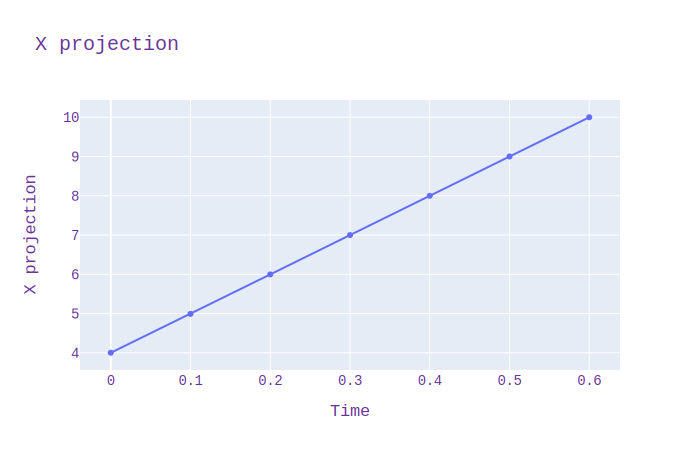

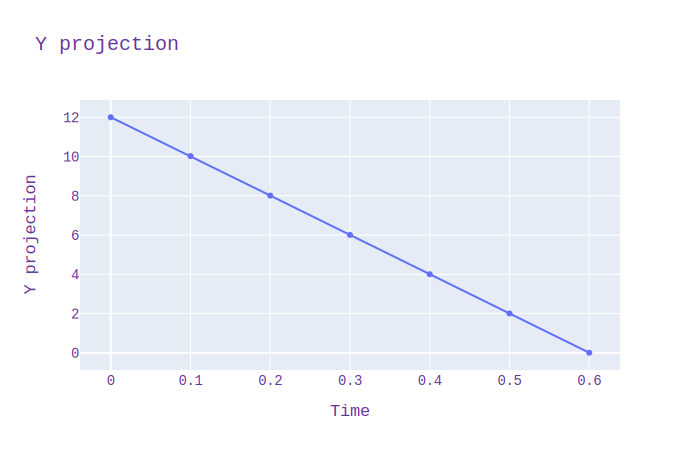

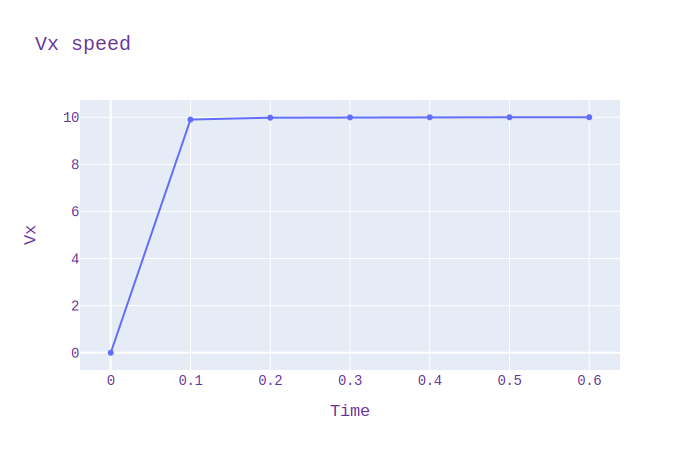

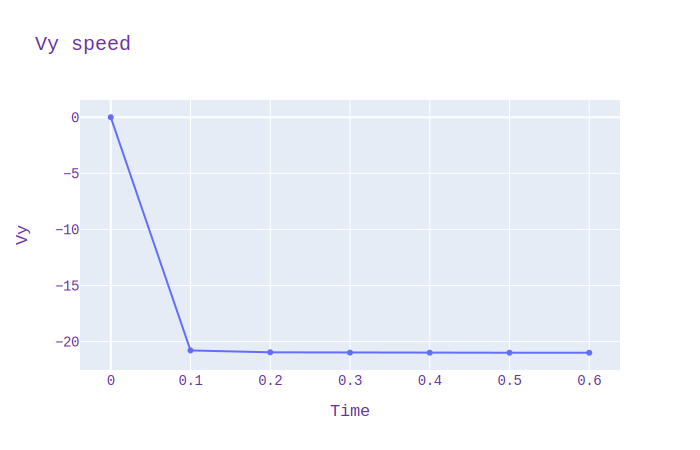

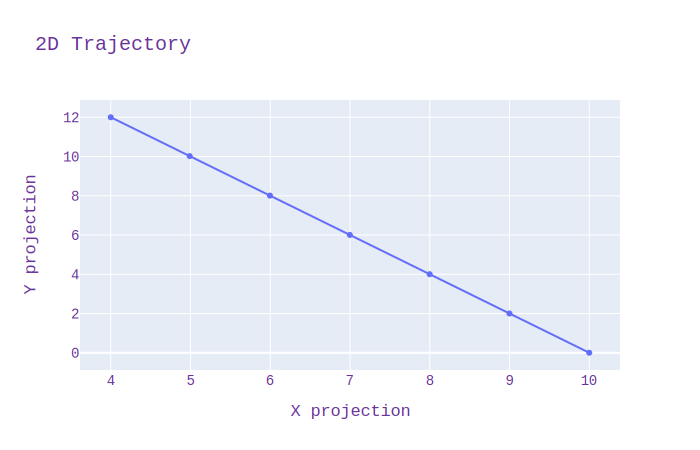

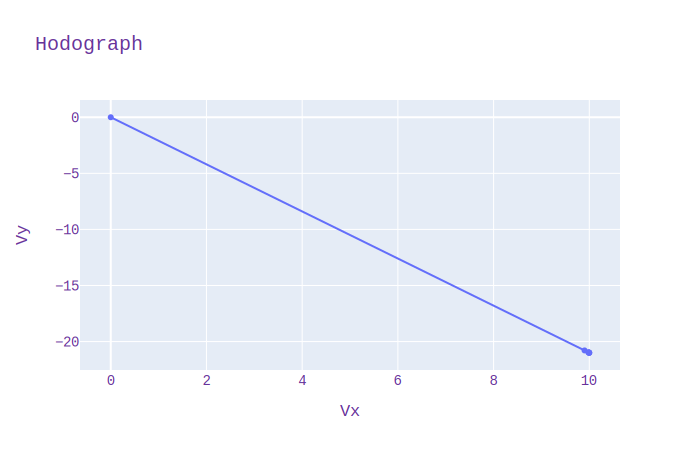

In [50]:
visualise_kalman(x_hist, E_hist)

Visualize the components of the $ K $ matrix below

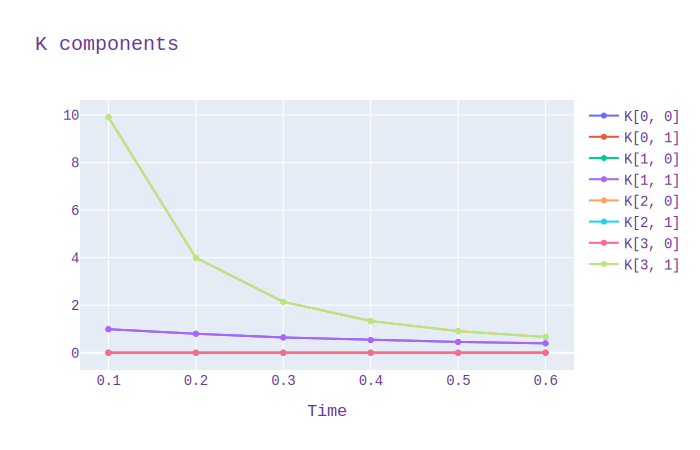

In [51]:
visualise_K(k_log)

## Second experiment

In [52]:
measurements = [[1.0, 4.0], [6.0, 0.0], [11.0, -4.0], [16.0, -8.0]]
initial_xy = [-4.0, 8.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [53]:
k_log, x_hist, E_hist = kalman_filter(x, E)

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

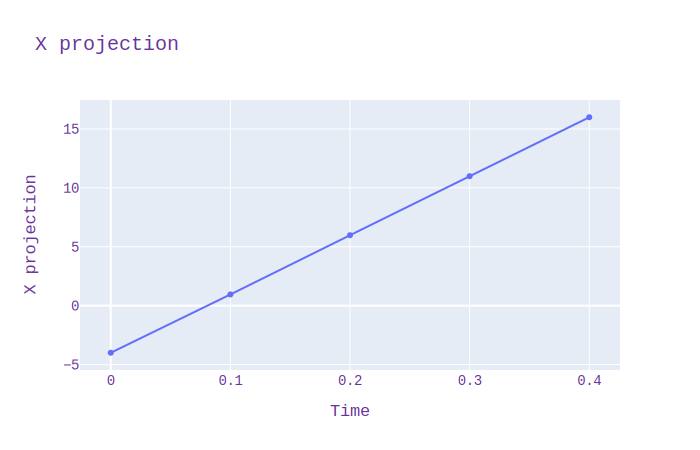

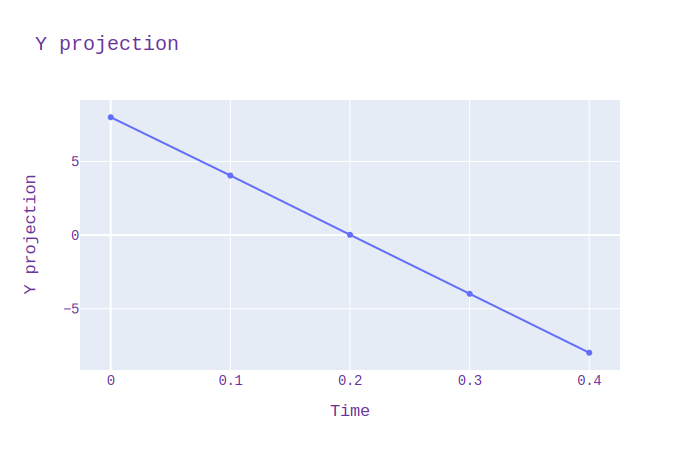

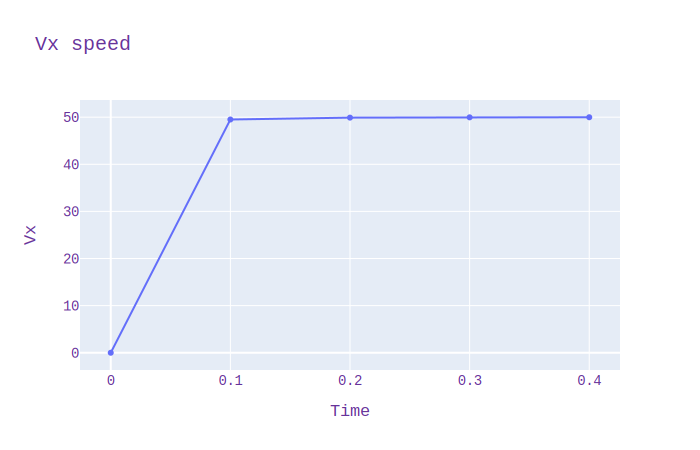

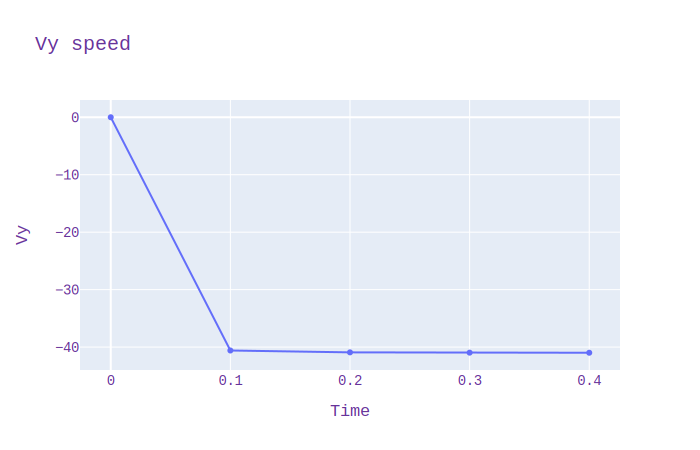

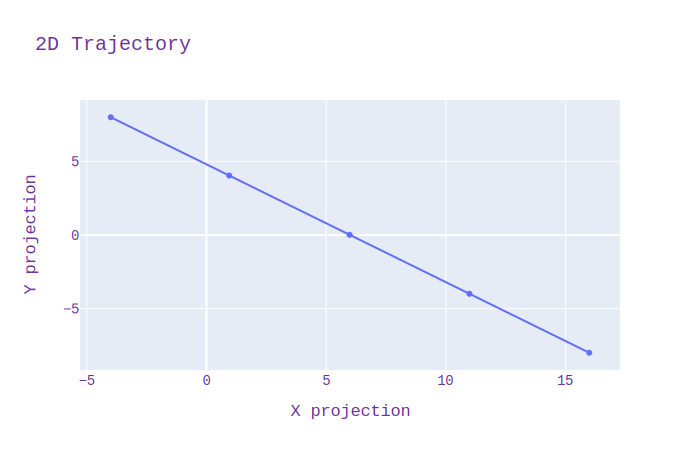

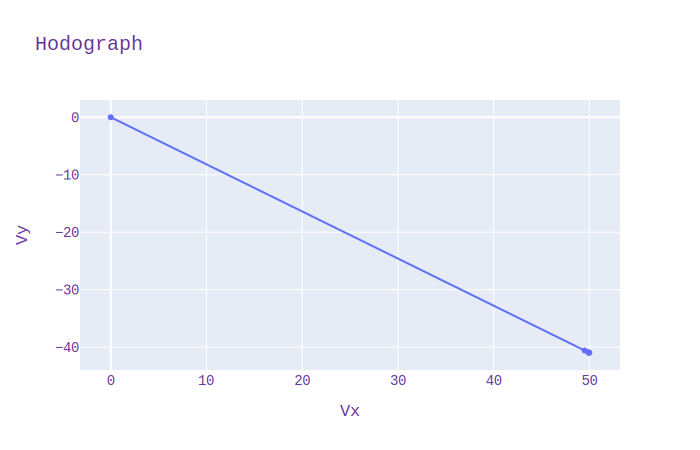

In [54]:
visualise_kalman(x_hist, E_hist)

Visualize the components of the $ K $ matrix below

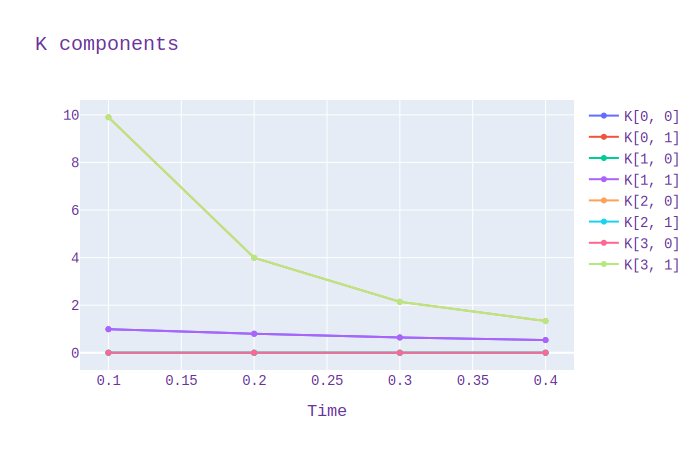

In [55]:
visualise_K(k_log)

## Third Experiment

In [56]:
measurements = [[1.0, 17.0], [1.0, 15.0], [1.0, 13.0], [1.0, 11.0]]
initial_xy = [1.0, 19.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [57]:
k_log, x_hist, E_hist = kalman_filter(x, E)

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

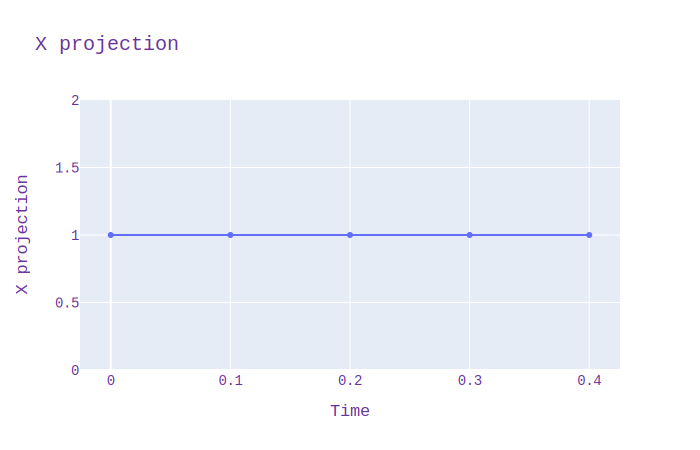

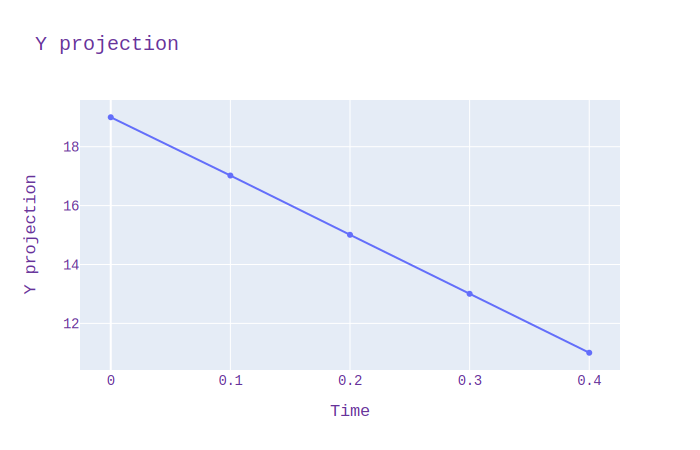

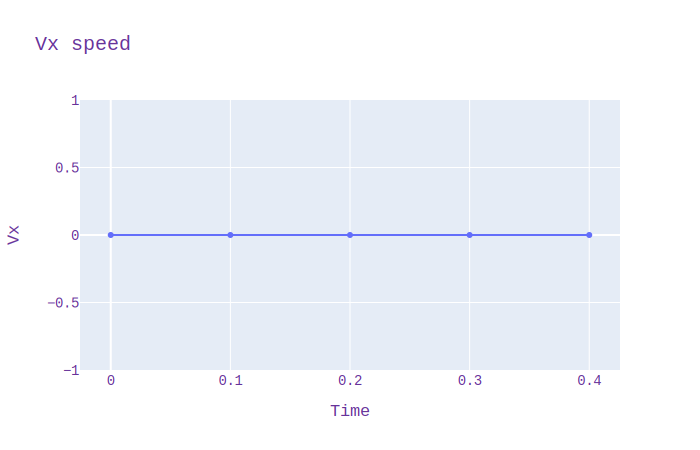

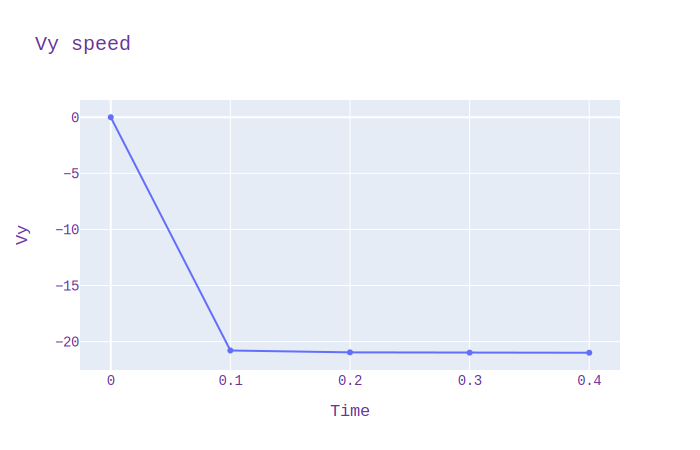

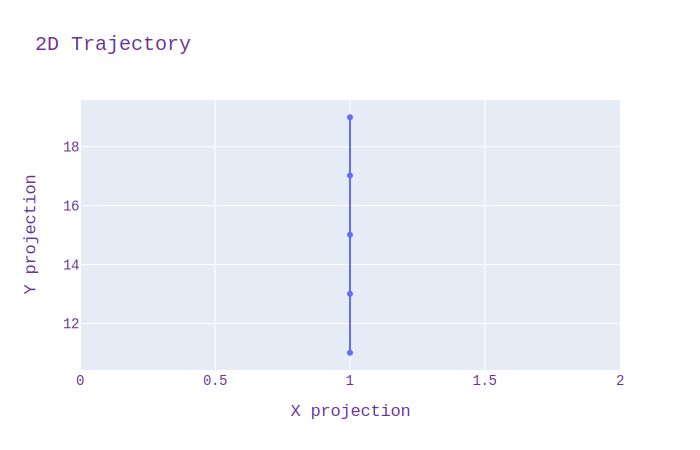

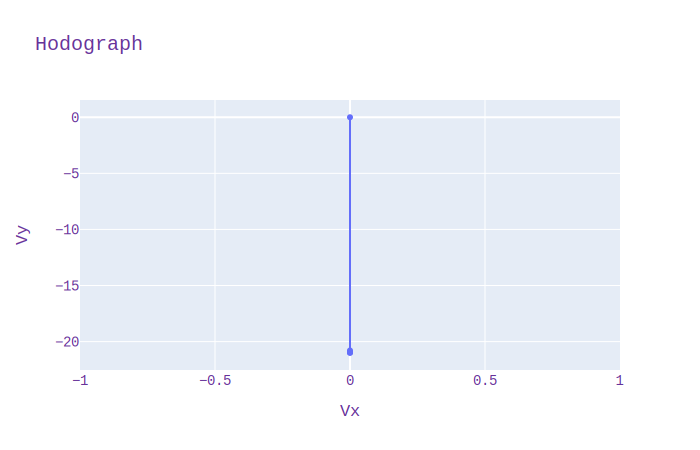

In [58]:
visualise_kalman(x_hist, E_hist)

Visualize the components of the $ K $ matrix below

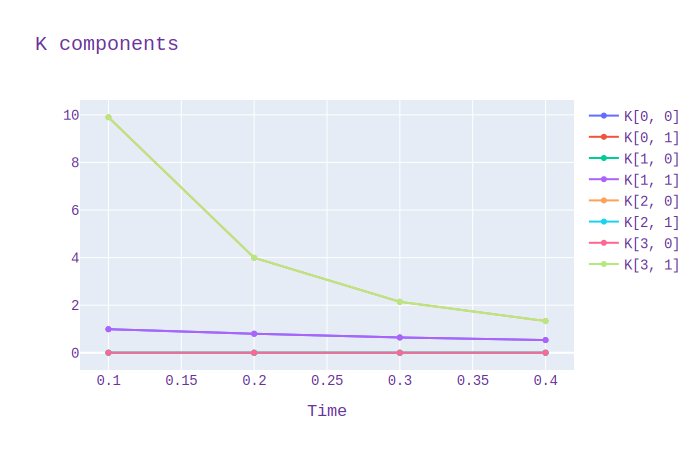

In [59]:
visualise_K(k_log)

## Conclusions

Don't forget to put your thoughts on the experiments above.

Questions to stimulate thoughts could be found in the beginning of the notebook =)